In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [15]:
df = pd.read_csv('/home/my_repos/learning-projects/ml-zoomcamp/midterm-project/spotify_song_cleaned.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28351 entries, 0 to 28350
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           28351 non-null  object 
 1   track_name         28351 non-null  object 
 2   track_artist       28351 non-null  object 
 3   track_popularity   28351 non-null  int64  
 4   track_album_id     28351 non-null  object 
 5   track_album_name   28351 non-null  object 
 6   playlist_name      28351 non-null  object 
 7   playlist_id        28351 non-null  object 
 8   playlist_genre     28351 non-null  object 
 9   playlist_subgenre  28351 non-null  object 
 10  danceability       28351 non-null  float64
 11  energy             28351 non-null  float64
 12  key                28351 non-null  int64  
 13  loudness           28351 non-null  float64
 14  mode               28351 non-null  int64  
 15  speechiness        28351 non-null  float64
 16  acousticness       283

In [17]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 
             'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
             'tempo', 'duration_ms']

In [19]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.valence.values
y_test = df_test.valence.values

In [21]:
train_dicts = df_train[columns].to_dict(orient='records')
test_dicts = df_test[columns].to_dict(orient='records')

In [23]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

In [37]:
evals_result = {}

features = dv.get_feature_names_out()

dtrain = xgb.DMatrix(X_train,
                     label=y_train,
                     feature_names=features)

dtest = xgb.DMatrix(X_test,
                     label=y_test,
                     feature_names=features)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(params=xgb_params, 
                      dtrain=dtrain, 
                      num_boost_round=50,
                      evals=watchlist,
                      evals_result=evals_result,
                      verbose_eval=1)

test_rmse_scores = evals_result['test']['rmse']
train_rmse_scores = evals_result['train']['rmse']

[0]	train-rmse:0.21967	test-rmse:0.21983


[1]	train-rmse:0.21024	test-rmse:0.21196
[2]	train-rmse:0.20380	test-rmse:0.20674
[3]	train-rmse:0.19899	test-rmse:0.20257
[4]	train-rmse:0.19529	test-rmse:0.20026
[5]	train-rmse:0.19203	test-rmse:0.19808
[6]	train-rmse:0.18982	test-rmse:0.19658
[7]	train-rmse:0.18762	test-rmse:0.19531
[8]	train-rmse:0.18555	test-rmse:0.19402
[9]	train-rmse:0.18394	test-rmse:0.19325
[10]	train-rmse:0.18269	test-rmse:0.19266
[11]	train-rmse:0.18100	test-rmse:0.19185
[12]	train-rmse:0.17972	test-rmse:0.19148
[13]	train-rmse:0.17853	test-rmse:0.19117
[14]	train-rmse:0.17766	test-rmse:0.19089
[15]	train-rmse:0.17659	test-rmse:0.19058
[16]	train-rmse:0.17569	test-rmse:0.19034
[17]	train-rmse:0.17509	test-rmse:0.19033
[18]	train-rmse:0.17401	test-rmse:0.19018
[19]	train-rmse:0.17325	test-rmse:0.18998
[20]	train-rmse:0.17233	test-rmse:0.18991
[21]	train-rmse:0.17175	test-rmse:0.18981
[22]	train-rmse:0.17111	test-rmse:0.18973
[23]	train-rmse:0.17046	test-rmse:0.18951
[24]	train-rmse:0.17013	test-rmse:0.18946
[

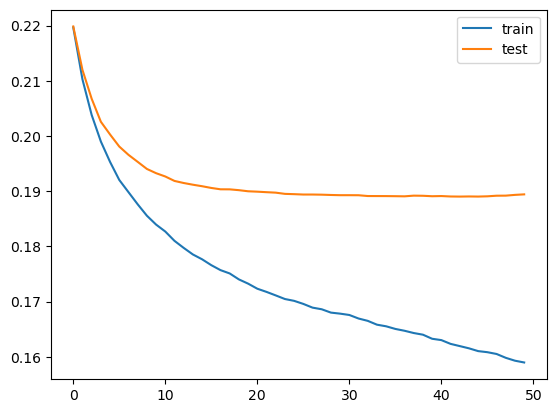

In [39]:
plt.plot(train_rmse_scores, label='train')
plt.plot(test_rmse_scores, label='test')
plt.legend()
plt.show()